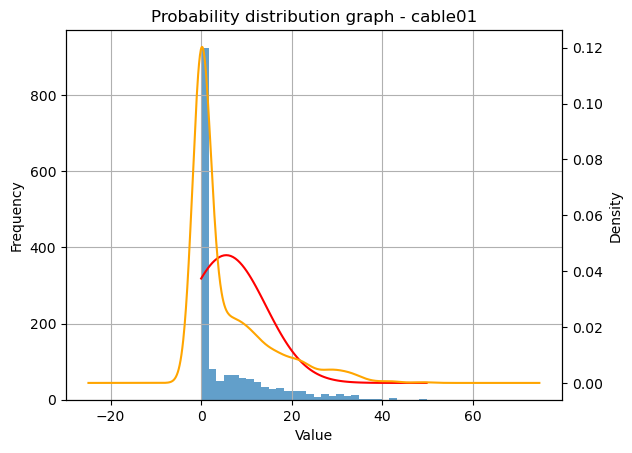

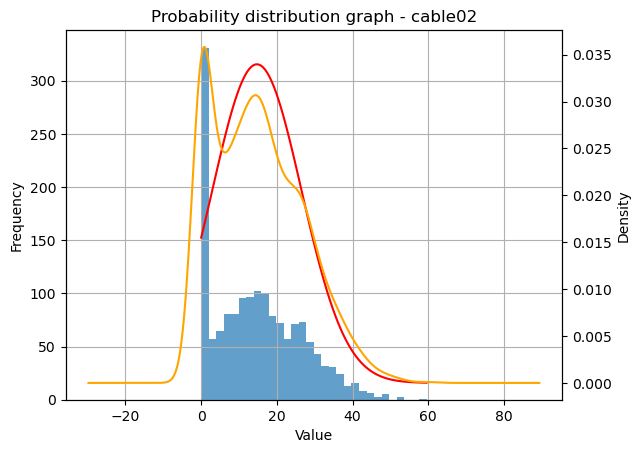

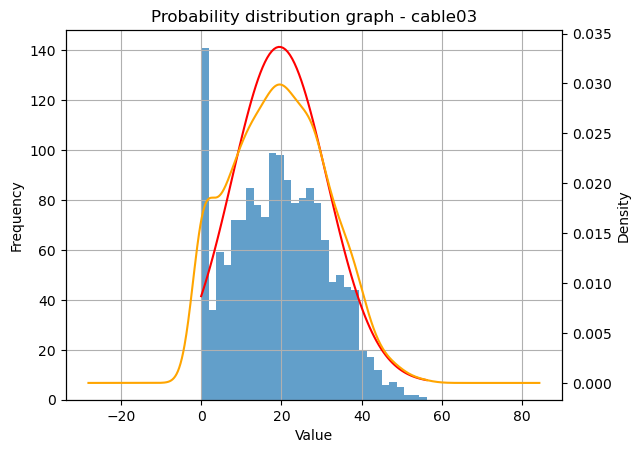

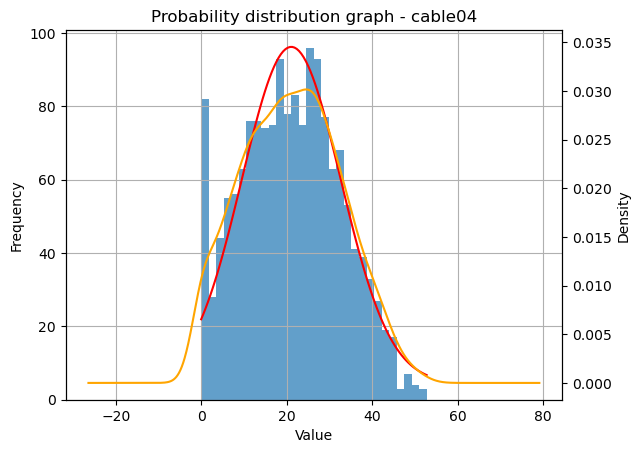

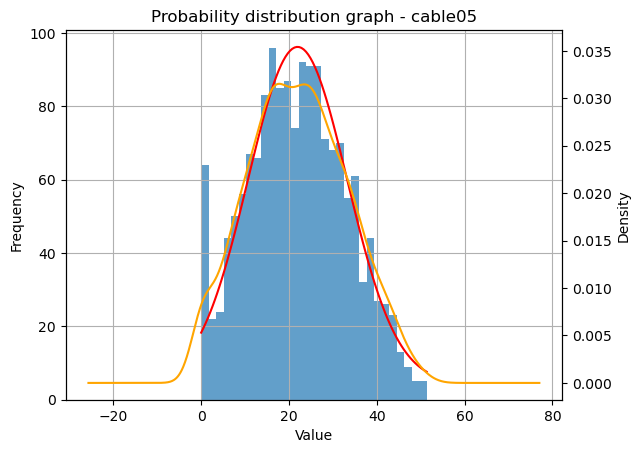

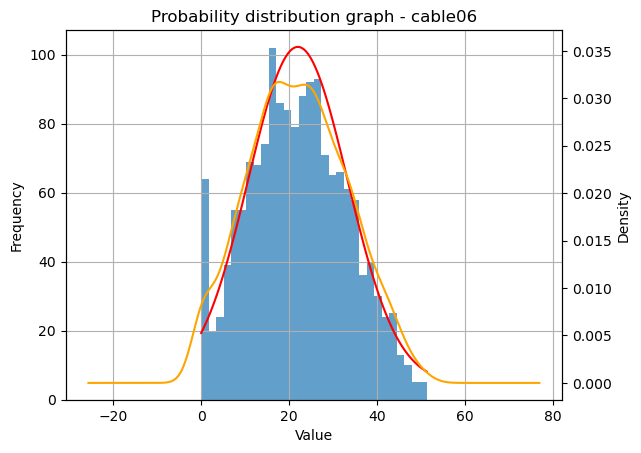

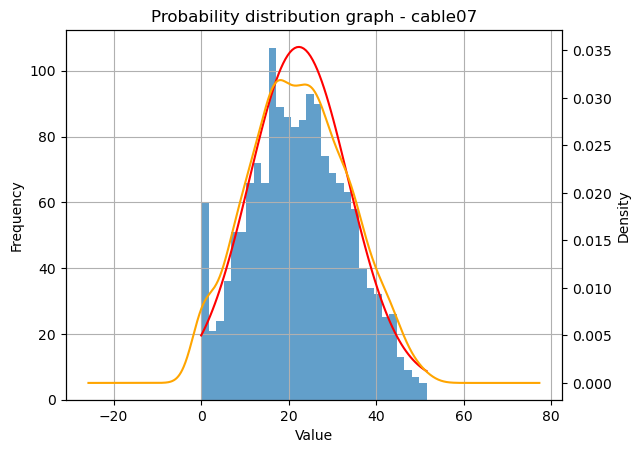

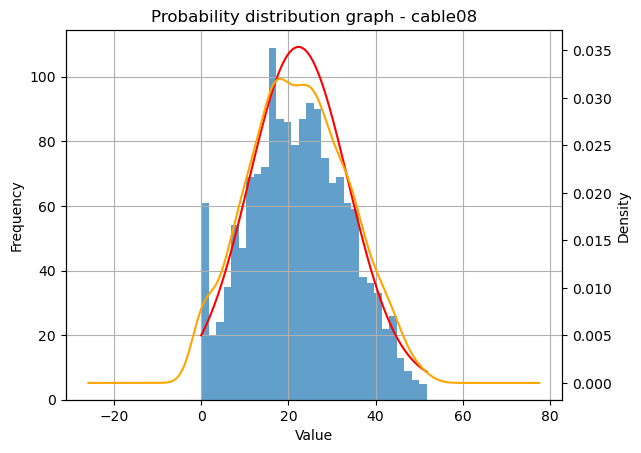

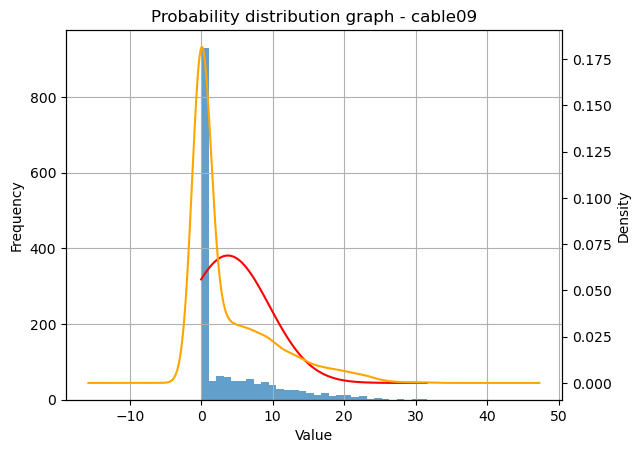

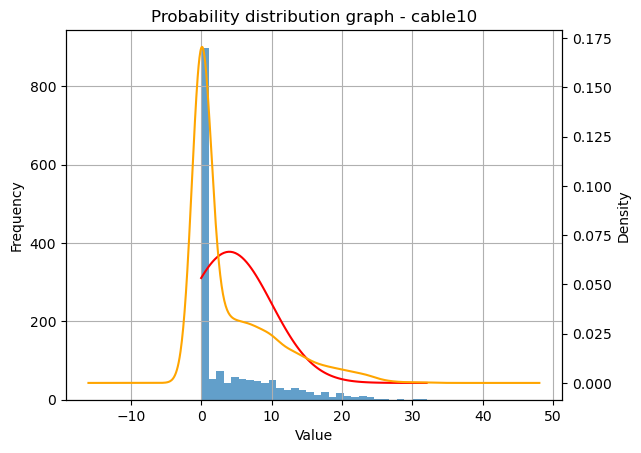

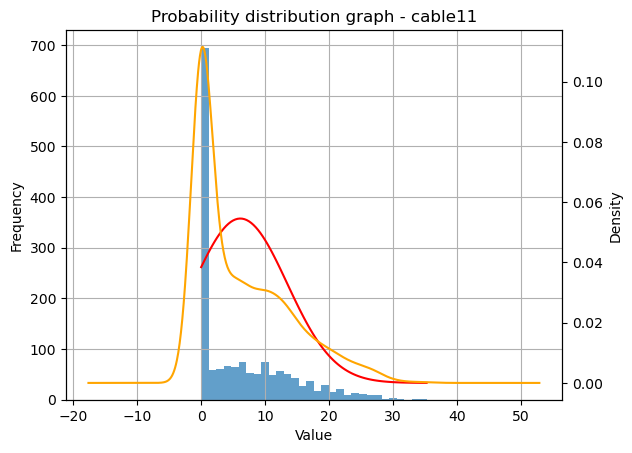

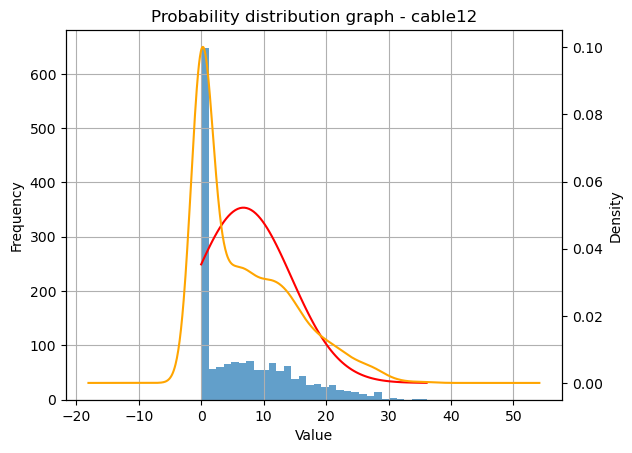

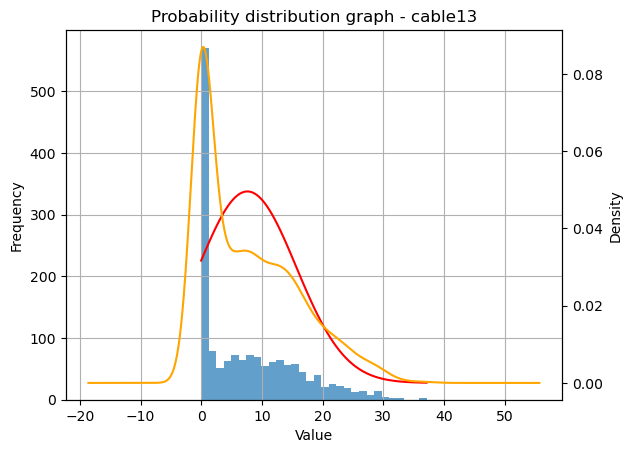

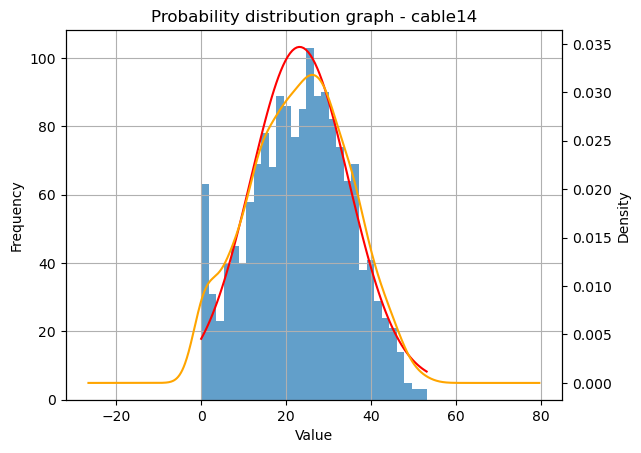

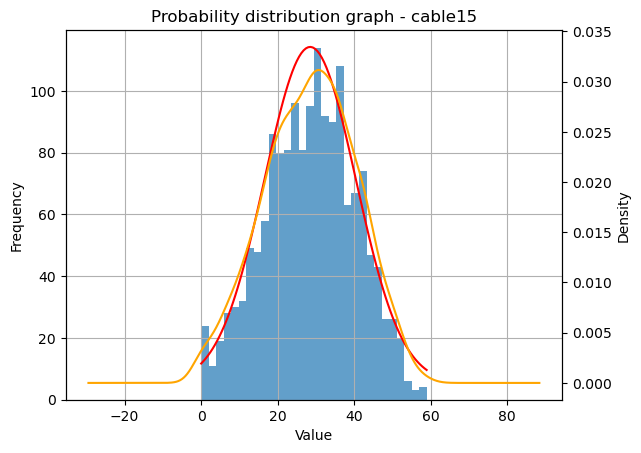

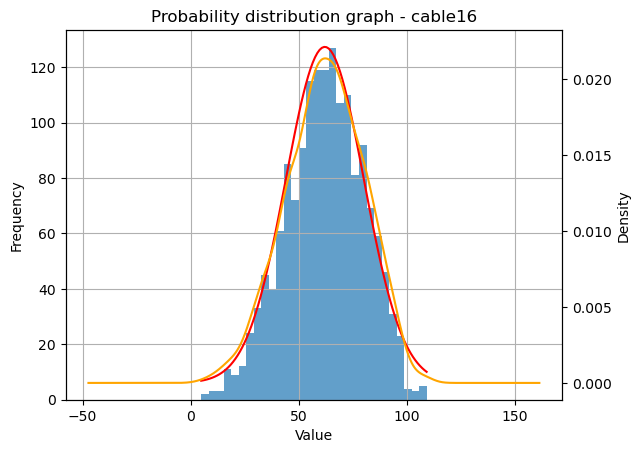

In [77]:
import pandas as pd
import numpy as np
from scipy.stats import norm
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 读取Excel文件
df = pd.read_excel('新的数据.xlsx', sheet_name=None)

# 遍历所有的sheet
for sheet_name in df:
    # 判断时间字段所在的列索引（假设时间字段在第一列）
    time_column_index = 0
    
    # 将时间字段转换为数值类型
    df[sheet_name].iloc[:, time_column_index] = pd.to_numeric(df[sheet_name].iloc[:, time_column_index], errors='coerce')
    
    # 获取每个sheet中时间字段从200到最后的数据
    selected_rows = df[sheet_name][df[sheet_name].iloc[:, time_column_index] >= 200]
    
    selected_data_1_3 = selected_rows.iloc[:, 1:4]
    selected_data_4 = selected_rows.iloc[:, 4:]/1e4

    # 计算最大值、均值和方差
    max_value_4 = selected_data_4.max()
    mean_value_4 = selected_data_4.mean()
    variance_value_4 = selected_data_4.var()

    for col_name, column in selected_data_4.items():
        fig, ax1 = plt.subplots()

        # 绘制直方图
        column.hist(bins=30, alpha=0.7, ax=ax1)
        ax1.set_xlabel('Value')
        ax1.set_ylabel('Frequency')

        # 创建新的 y 轴并绘制正态分布曲线
        ax2 = ax1.twinx()
        
        # 生成正态分布曲线的 x 值范围
        x = np.linspace(column.min(), column.max(), 100)
        
        # 计算正态分布的 y 值
        y = norm.pdf(x, mean_value_4[col_name], np.sqrt(variance_value_4[col_name]))
        
        # 绘制正态分布曲线
        ax2.plot(x, y, 'r-', label='Normal Distribution')
        column.plot(kind='kde', ax=ax2, color='orange')
        ax2.set_ylabel('Density')

        # 绘制核密度估计曲线

        plt.title(f'Probability distribution graph - cable{col_name[2:].zfill(2)}')
        plt.show()